# 이동평균 필터

- 증권가에서 주로 사용 (5일 이평선(5일 동안의 주가에 대한 이동평균), 20일 이평선)

## 이동평균의 재귀식
- 평균을 취하면 데이터에서 잡음 제거할 수 있으나, 측정하려는 물리량이 시간에 따라 변하는 경우, 평균을 취하는 것은 적절하지 않음
- 평균은 데이터의 동적인 변화 없애기 때문
- 이동평균 : 잡음을 없애는 동시에 시스템의 동적변화 반영하는 방법
- 지정된 개수의 최근 측정값만 가지고 계산한 평균
- 새로운 데이터가 들어오면 가장 오래된 데이터는 버리는 방식

## 이동평균 필터 함수
- 이동평균은 평균필터와 달리 재귀식을 사용하는 이점이 별로 없음 (계산량이 일정하므로)
- n개의 최근 데이터가 모두 보관되어야하고, 데이터 입력마다 갱신되어야 하므로 메모리 공간절약 이점도 없음
- 배치식과 재귀식 모두 구현

### 이동평균 필터 함수 프로그램 구현 (Python)
- 프로그램 구동 초기에는 이동평균 함수의 계산값을 버리고, 측정 데이터가 충분히 쌓인 후부터 사용하는 것이 안전
- 보통 내부 버퍼의 초깃값을 0으로 지정 (여기에서는 제일 처음 입력된 측정 데이터로 내부버퍼 초기화)
- 평균 계산에 동원되는 데이터 개수는 함수 입력시 지정

In [5]:
def mov_avg_filter(x_n, x_meas):
    """이동평균 이용하여 초음파 거리 계산 (배치식)."""
    n = len(x_n)
    for i in range(n-1):
        x_n[i] = x_n[i+1]
    x_n[n-1] = x_meas
    x_avg = np.mean(x_n)
    return x_avg, x_n

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

## 예제 : 초음파 거리계
- 예제 2-1 : 이평손 연구원은 초음파 거리계는 개발하는 중이다. 시제품의 성능을 검증하기 위해 헬기에 초음파거리계를 장착하고 지면까지의 거리를 측정하는 비행 시험을 실시했다. 측정값은 0.02초 간격으로 저장했다. 그런데 헬기의 진동, 지면 상태 등의 영향으로 측정 데이터에 잡음이 심했다. 이동평균필터로 이 잡음을 제거해보자.

In [3]:
input_mat = io.loadmat('./Kalman_data/SonarAlt.mat')

In [6]:
def get_sonar(i):
    """초음파 거리계 측정값 읽어오기, 미리 저장해 놓은 데이터 하나씩 반환"""
    z = input_mat['sonarAlt'][0][i]  # input_mat['sonaralt']: (1, 1501)
    return z

In [7]:
# Input parameters.
n = 10
n_samples = 500
time_end = 10

In [8]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [9]:
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

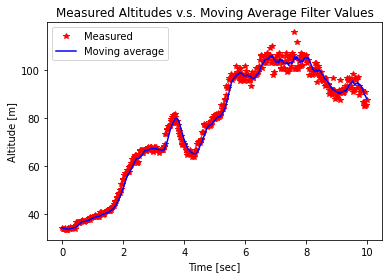

In [10]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.show()

- 측정거리와 이동평균 필터 출력값 비교한 그래프
- 측정데이터 잡음 효과적 제거 및 고도 변화 추이 측정 잘 됨
- 6~8초 사이 잡음이 심한데도 이동평균 출력은 비교적 안정
- 필터링된 고도에 시간지연 (실제 고도변화가 조금씩 늦게 반영)이 너무 크다면 데이터 개수를 줄여야 함
- 시간지연과 잡음제거성능은 반비례 관계 (데이터 개수를 잘 설정해야 함)

## 2장 요약
- 이동평균 필터는 측정데이터 잡음제거에 유용
- 평균계산에 포함되는 데이터 개수가 많으면 잡음 제거성능은 좋아지지만, 시간지연이 생김
- 평균계산에 포함되는 데이터 개수가 적으면 시간 지연은 없지만, 잡음제거성능은 떨어짐
- 적절한 이동평균의 데이터 개수 선정 필요
- 이동평균 필터는 평균필터와 달리 알고리즘을 재귀식으로 바꿔도 별 이점 없음